# Importando bibliotecas, lendo apenas as colunas necessárias e imprimindo apenas cinco linhas com a função .head()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_enade_2008/2.DADOS/microdados_enade_2008.csv", delimiter=';', encoding='iso-8859-1', usecols=['nu_ano', 'co_grupo', 'tp_sexo'])
df.head()

,nu_ano,co_grupo,tp_sexo
0,2008,7,2
1,2008,7,1
2,2008,7,1
3,2008,7,1
4,2008,7,1


**Distribuição dos alunos por curso no enem em um universo de todos os cursos**

Text(0, 0.5, 'Alunos')

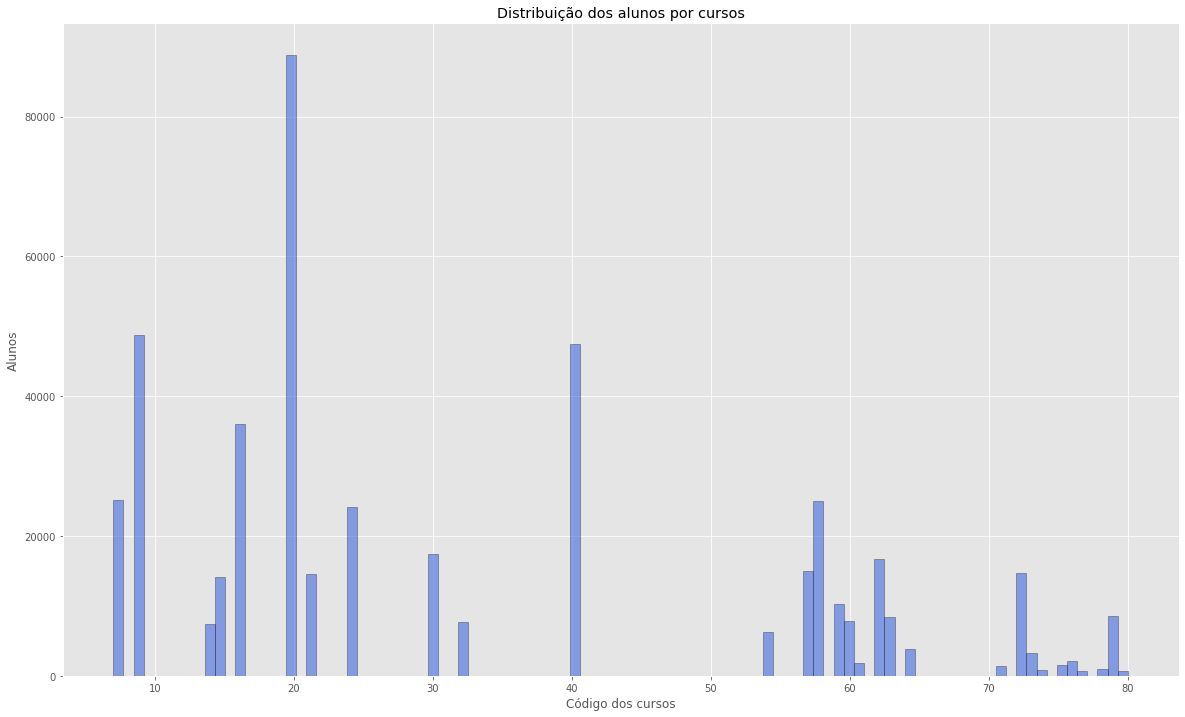

In [2]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["co_grupo"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos")
plt.xlabel("Código dos cursos")
plt.ylabel("Alunos")

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função count para saber a quantidade de alunos nos cursos.**

In [3]:
df = df.loc[(df['co_grupo']==40) | (df['co_grupo']==72) | (df['co_grupo']==79)]
df.count()

nu_ano      70769
co_grupo    70769
tp_sexo     70769
dtype: int64

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função assign para criar uma nova coluna de nome curso.**

In [4]:
df = df.loc[(df['co_grupo']==40) | (df['co_grupo']==72) | (df['co_grupo']==79)].assign(curso=df.co_grupo) 
df.sample()

,nu_ano,co_grupo,tp_sexo,curso
453361,2008,79,1,79


**Criando a função define_nome para converter o código do curso em nome do curso.**

In [5]:
def define_nome(num):
    if num == 40:
        return ' COMPUTAÇÃO'
    elif num == 72:
        return 'TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS'
    elif num == 79:
        return 'TECNOLOGIA EM REDES DE COMPUTADORES'
    
df['curso'] = df['co_grupo'].map(define_nome)
df.head()

,nu_ano,co_grupo,tp_sexo,curso
284307,2008,40,1,COMPUTAÇÃO
284308,2008,40,1,COMPUTAÇÃO
284309,2008,40,1,COMPUTAÇÃO
284310,2008,40,2,COMPUTAÇÃO
284311,2008,40,1,COMPUTAÇÃO


**Distribuição dos alunos por curso no enem em um universo dos cursos da área de TI**

Text(0, 0.5, 'Alunos')

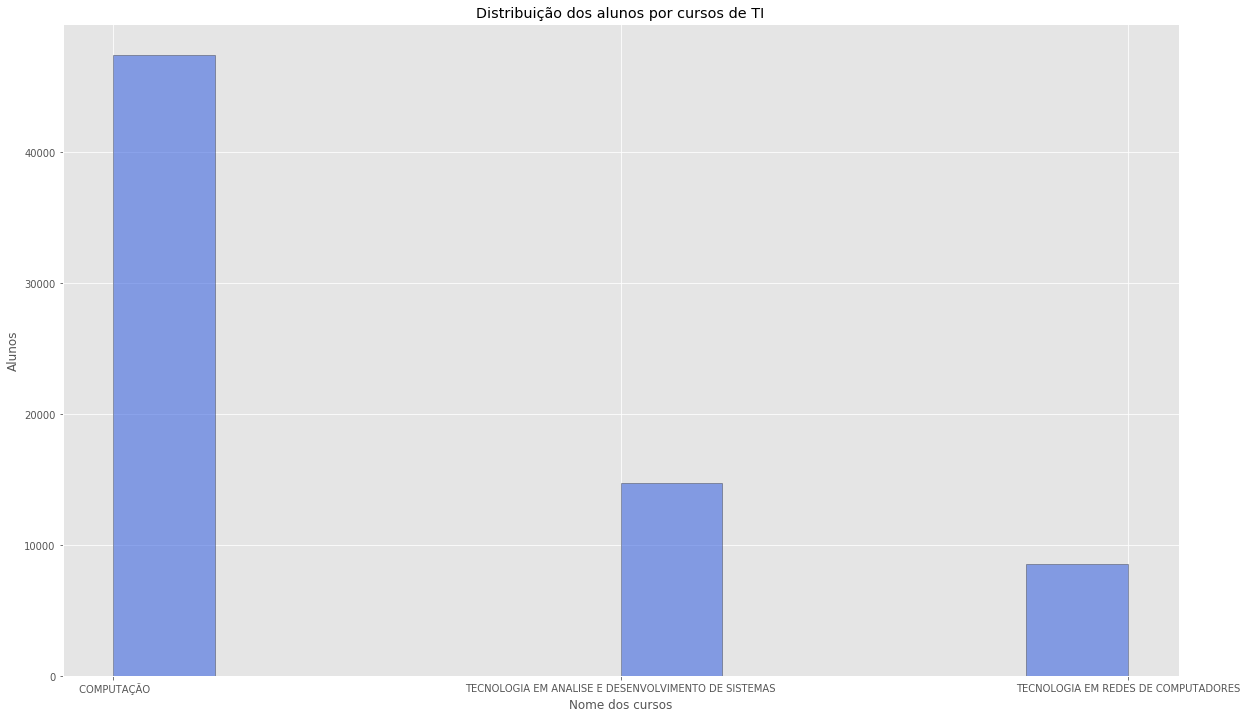

In [6]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["curso"].hist(bins = 10, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos de TI")
plt.xlabel("Nome dos cursos")
plt.ylabel("Alunos")

**Imprimindo o número de alunos por curso da área de TI, a legenda dos códigos dos cursos está no rodapé.**

In [7]:
dfTotal =df.loc[(df['co_grupo']==40) | (df['co_grupo']==72) | (df['co_grupo']==79)] 
dfTotal['co_grupo'].value_counts()

40    47459
72    14730
79     8580
Name: co_grupo, dtype: int64

**Contando o número total de alunos por gênero de sexo na área de TI.<br> São 59.709 alunos do sexo masculino, 11.060 do sexo feminino.**

In [8]:
dfAlunos = df.loc[(df['co_grupo']==40) | (df['co_grupo']==72) | (df['co_grupo']==79)]
dfAlunos['tp_sexo'].value_counts()

1    59709
2    11060
Name: tp_sexo, dtype: int64

**Imprimindo gráfico pizza da representação masculina e feminina no total.**

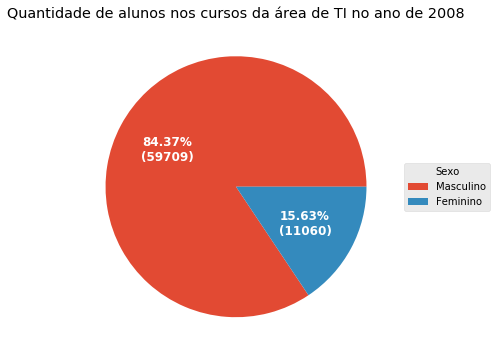

In [9]:
# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
# Criando nosso conjunto de dados
sexo = ['Masculino', 'Feminino']
quant = [59709, 11060] 


# Aqui serão colocados os alunos e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(round(pct/100.*np.sum(allvals)))
    # fazendo legenda do gráfico com % e Nº de Alunos
    return "{:.2f}%\n({:d})".format(pct, absolute)
    
# Criando o gráfico e colocando a função da legenda interna 
wedges, texts, autotexts = ax.pie(quant, autopct=lambda pct: func(pct, quant),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai aparecer
ax.legend(wedges, sexo,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12, weight="bold")

# Título do gráfico
ax.set_title("Quantidade de alunos nos cursos da área de TI no ano de 2008")

# Mostrando o gráfico
plt.show()

# **Legendas:**
### Coluna sexo
**1** : Masculino<br>
**2** : Feminino
### Coluna Curso
**40 -** COMPUTAÇÃO<br>
**72 -** TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS<br>
**79 -** TECNOLOGIA EM REDES DE COMPUTADORES
## Observações:
#### Nesse arquivo o enade promoveu algumas mudanças, o curso de computação foi desmembrado. Alguns cursos são subdivisões e foram desprezados para o cálculo. Levou-se em consideração apenas os cursos desmembrados.